In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler 
import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
data = pd.read_csv('dataAudio.csv')

#Gereksiz sütunların bırakılması
data.head() 

#Etiketleri Kodlamak
data = data.drop(['filename'],axis=1)
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()

#Özellik sütunlarını ölçeklendirme
y = encoder.fit_transform(genre_list)
scaler = StandardScaler()

#Verileri eğitim ve Test setine bölme
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
# input_dim = features, 
# units= yapay sinir hücresi, 
# init=yapay sinir hücresi içerisindeki ağırlıkları rastgele yerine belirli algoritmaya göre verir

In [4]:
model = Sequential()

# 1. Katman - Input
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

# 2. Katman 
model.add(Dense(128, activation='relu'))

# 3. Katman
model.add(Dense(64, activation='sigmoid'))

# 4. Katman - Output
model.add(Dense(10, activation='sigmoid'))


# sparse_categorical_crossentropy = Etiketler ve tahminler arasındaki çapraz entropi kaybını hesaplar.
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [5]:
# epochs = ağırlıkları yeniden düzenleyerek çözüme en yakın değeri buluncaya kadar yapılacak deneme sayısı
# batch_size = tek seferde alınacak veri sayısı
# verbose = hatanın gösterilmemesi
# validation_split = doğrulama için eğitim verilerinin bir kısmını otomatik olarak ayırmaya izin verir.

In [16]:
history = model.fit(X_train,y_train,validation_split=0.33,epochs=200,batch_size=48)

Epoch 1/200
120/120 [==============================] - 1s 4ms/step - loss: 0.1213 - accuracy: 0.9698 - val_loss: 2.0092 - val_accuracy: 0.5969
Epoch 2/200
120/120 [==============================] - 1s 5ms/step - loss: 0.1137 - accuracy: 0.9753 - val_loss: 2.0292 - val_accuracy: 0.5990
Epoch 3/200
120/120 [==============================] - 1s 5ms/step - loss: 0.1150 - accuracy: 0.9731 - val_loss: 2.0529 - val_accuracy: 0.6008
Epoch 4/200
120/120 [==============================] - 0s 4ms/step - loss: 0.1203 - accuracy: 0.9745 - val_loss: 2.0410 - val_accuracy: 0.6040
Epoch 5/200
120/120 [==============================] - 0s 3ms/step - loss: 0.1222 - accuracy: 0.9720 - val_loss: 2.0478 - val_accuracy: 0.6033
Epoch 6/200
120/120 [==============================] - 0s 4ms/step - loss: 0.1178 - accuracy: 0.9733 - val_loss: 2.0171 - val_accuracy: 0.6043
Epoch 7/200
120/120 [==============================] - 0s 4ms/step - loss: 0.1124 - accuracy: 0.9752 - val_loss: 2.0439 - val_accuracy: 0.6029

Epoch 58/200
120/120 [==============================] - 0s 4ms/step - loss: 0.1058 - accuracy: 0.9726 - val_loss: 2.2627 - val_accuracy: 0.5937
Epoch 59/200
120/120 [==============================] - 0s 4ms/step - loss: 0.1093 - accuracy: 0.9719 - val_loss: 2.2232 - val_accuracy: 0.5951
Epoch 60/200
120/120 [==============================] - 0s 4ms/step - loss: 0.0872 - accuracy: 0.9820 - val_loss: 2.2335 - val_accuracy: 0.6026
Epoch 61/200
120/120 [==============================] - 0s 4ms/step - loss: 0.0845 - accuracy: 0.9827 - val_loss: 2.2375 - val_accuracy: 0.5933
Epoch 62/200
120/120 [==============================] - 0s 4ms/step - loss: 0.0927 - accuracy: 0.9792 - val_loss: 2.2625 - val_accuracy: 0.5951
Epoch 63/200
120/120 [==============================] - 0s 4ms/step - loss: 0.1566 - accuracy: 0.9488 - val_loss: 2.3572 - val_accuracy: 0.5923
Epoch 64/200
120/120 [==============================] - 0s 4ms/step - loss: 0.1810 - accuracy: 0.9432 - val_loss: 2.2506 - val_accuracy:

Epoch 115/200
120/120 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.9787 - val_loss: 2.4357 - val_accuracy: 0.5951
Epoch 116/200
120/120 [==============================] - 0s 3ms/step - loss: 0.1736 - accuracy: 0.9451 - val_loss: 2.4766 - val_accuracy: 0.5898
Epoch 117/200
120/120 [==============================] - 0s 3ms/step - loss: 0.1929 - accuracy: 0.9339 - val_loss: 2.4276 - val_accuracy: 0.5869
Epoch 118/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0925 - accuracy: 0.9755 - val_loss: 2.4036 - val_accuracy: 0.5979
Epoch 119/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.9864 - val_loss: 2.3885 - val_accuracy: 0.6011
Epoch 120/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0659 - accuracy: 0.9851 - val_loss: 2.3775 - val_accuracy: 0.6001
Epoch 121/200
120/120 [==============================] - 0s 2ms/step - loss: 0.0648 - accuracy: 0.9848 - val_loss: 2.3877 - val_ac

120/120 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.9864 - val_loss: 2.5542 - val_accuracy: 0.5955
Epoch 172/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9888 - val_loss: 2.5520 - val_accuracy: 0.5987
Epoch 173/200
120/120 [==============================] - 0s 4ms/step - loss: 0.0890 - accuracy: 0.9750 - val_loss: 2.6133 - val_accuracy: 0.5891
Epoch 174/200
120/120 [==============================] - 0s 4ms/step - loss: 0.1752 - accuracy: 0.9441 - val_loss: 2.5543 - val_accuracy: 0.5749
Epoch 175/200
120/120 [==============================] - 0s 4ms/step - loss: 0.1681 - accuracy: 0.9423 - val_loss: 2.5203 - val_accuracy: 0.6004
Epoch 176/200
120/120 [==============================] - 0s 4ms/step - loss: 0.0734 - accuracy: 0.9834 - val_loss: 2.5339 - val_accuracy: 0.5955
Epoch 177/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0577 - accuracy: 0.9872 - val_loss: 2.5114 - val_accuracy: 0.5937

In [17]:
test_loss, test_acc = model.evaluate(X_train,y_train)
print("The test loss is: ", test_loss)
print("The best accuracy is: %", test_acc*100)

267/267 [==============================] - 1s 2ms/step - loss: 0.8820 - accuracy: 0.8597
The test loss is:  0.8819581866264343
The best accuracy is: % 85.96861362457275


In [18]:
# tüm verileri listeleme
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


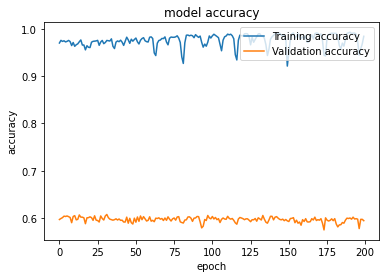

In [19]:
# accuracy geçmişi
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper right')
plt.show()

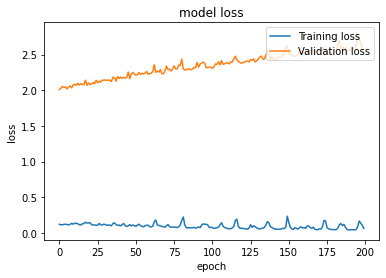

In [20]:
# loss geçmişi
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()